# Seleção de atributos Random Forest

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def calcular_importancia_atributos(caminho_csv):
    # Carregar os dados
    df = pd.read_csv(caminho_csv)
    
    # Definir atributos e alvo
    X = df.drop(columns=['patientunitstayid', 'diagnostico'])  # Atributos
    y = df['diagnostico']  # Alvo
    
    # Dividir os dados em treino, validação e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    
    # Definir a grade de parâmetros para o RandomizedSearchCV
    params_grid = {
        'bootstrap': [True, False],
        'max_depth': [20, 40, 60, 80],
        'max_features': [None, 'sqrt', 'log2'],  # Atualizado aqui
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [100, 200]
    }
    
    # Configurar o classificador RandomForest
    rf = RandomForestClassifier()
    grid_classifier = RandomizedSearchCV(estimator=rf, param_distributions=params_grid, n_iter=100, cv=5, verbose=0, random_state=42, n_jobs=-1)
    grid_classifier.fit(X_val, y_val)
    
    # Obter os melhores parâmetros
    best_parameters = grid_classifier.best_params_
    
    # Treinar o modelo com os melhores parâmetros
    model = RandomForestClassifier(**best_parameters)
    model.fit(X_train, y_train)
    
    # Obter a importância dos atributos
    importances = model.feature_importances_
    
    # Criar um DataFrame com as importâncias dos atributos
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })
    
    # Normalizar as importâncias para que somem 100%
    feature_importance_df['Importance'] = feature_importance_df['Importance'] / feature_importance_df['Importance'].sum() * 100
    
    # Ordenar o DataFrame pelas importâncias
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Mostrar as importâncias dos atributos
    print("Importância dos Atributos:")
    print(feature_importance_df)
    
    # Plotar a importância dos atributos
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='blue')
    plt.xlabel('Importância (%)')
    plt.ylabel('Atributo')
    plt.title('Importância dos Atributos')
    plt.show()

Sem tratar missing data

Importância dos Atributos:
                       Feature  Importance
7                          WBC    5.292557
24                   platelets    4.677159
29                     glucose    4.231552
15                    systolic    3.864035
17                         MAP    3.703602
27                     albumin    3.531023
33                     calcium    3.521083
13                   heartRate    3.477925
8                       lymphs    3.465975
1                          age    3.408714
11                   pao2/fio2    3.398884
18           bloodUreaNitrogen    3.360681
16                   diastolic    3.330745
9                         resp    3.211535
6                      lactate    3.126173
10                   spo2/fio2    3.092862
34                   phosphate    3.083987
22                  hemoglobin    3.057227
28                    chloride    2.965182
30                      sodium    2.901238
20                   aspartate    2.891550
32                   potass

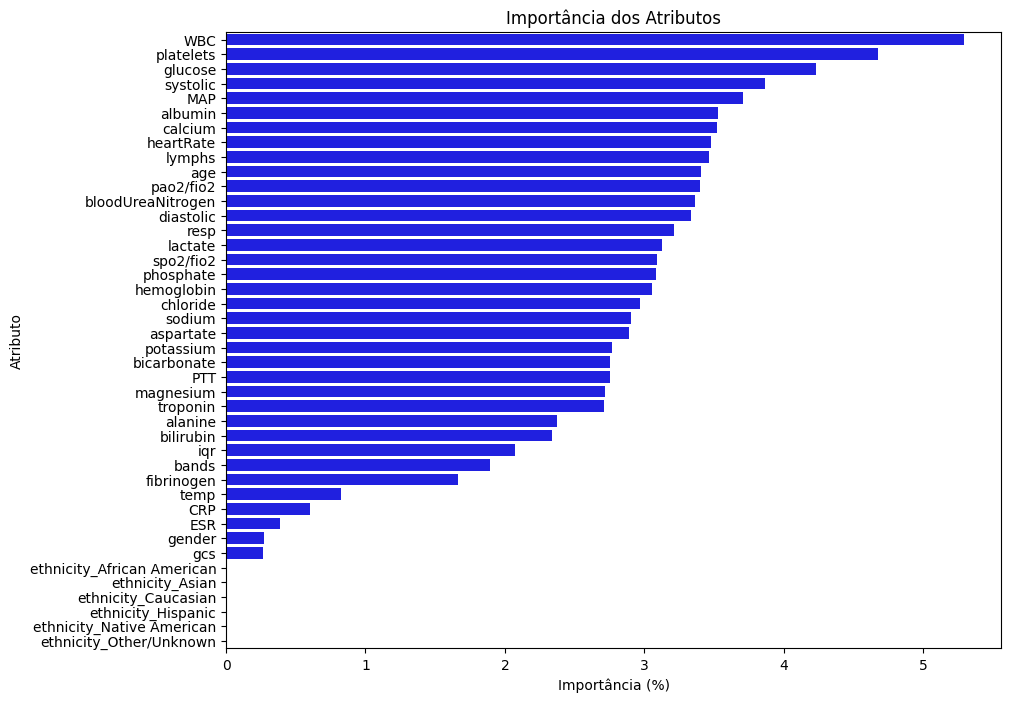

In [6]:
resultado = calcular_importancia_atributos('df_final.csv')

Regressao

Importância dos Atributos:
                       Feature  Importance
4                          ESR   15.134907
3                          CRP   11.932077
2                        bands    8.994141
11                   pao2/fio2    7.735853
22                  hemoglobin    4.938158
13                   heartRate    4.839134
24                   platelets    3.479657
5                         temp    2.969900
8                       lymphs    2.312983
33                     calcium    2.055812
9                         resp    1.935222
7                          WBC    1.912832
27                     albumin    1.830071
25                         PTT    1.829035
26                  fibrinogen    1.802619
1                          age    1.742552
10                   spo2/fio2    1.726964
20                   aspartate    1.608782
19                     alanine    1.605884
16                   diastolic    1.599846
29                     glucose    1.584470
14                    tropo

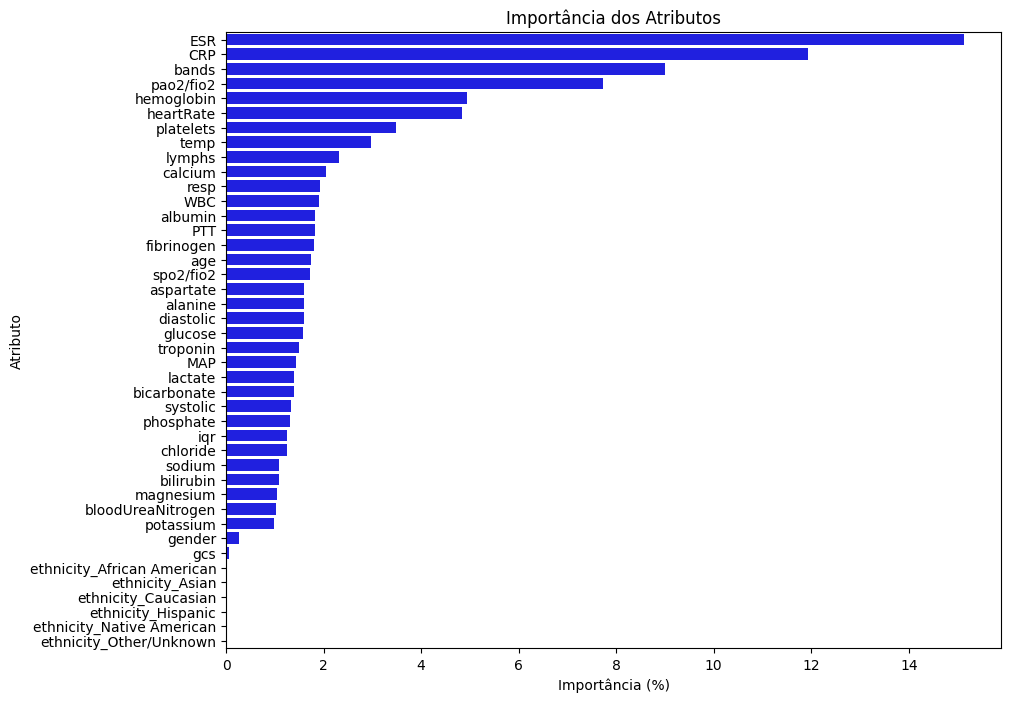

In [10]:
resultado_regressao = calcular_importancia_atributos('df_regressao.csv')

Media

In [46]:
resultado_media = calcular_importancia_atributos('df_media.csv')

                       Feature  Importance
3                          WBC    5.275248
24                     glucose    4.882127
20                   platelets    4.734107
1                          age    4.257838
13                         MAP    3.861704
18                  hemoglobin    3.813737
9                    heartRate    3.589608
23                    chloride    3.583465
11                    systolic    3.552557
28                     calcium    3.548588
12                   diastolic    3.542493
14           bloodUreaNitrogen    3.527684
27                   potassium    3.512560
7                    pao2/fio2    3.419482
4                       lymphs    3.344197
25                      sodium    3.329015
8                  bicarbonate    3.215329
16                   aspartate    3.212132
22                     albumin    3.195020
5                         resp    3.112261
30                   magnesium    3.042708
29                   phosphate    2.945668
6          

Valor Normal

In [49]:
resultado_normal = calcular_importancia_atributos('df_normal.csv')

                       Feature  Importance
3                          WBC    5.263414
24                     glucose    4.903594
20                   platelets    4.893969
1                          age    4.520996
13                         MAP    4.046478
18                  hemoglobin    3.897737
12                   diastolic    3.891620
14           bloodUreaNitrogen    3.838085
9                    heartRate    3.789451
23                    chloride    3.690391
27                   potassium    3.657954
28                     calcium    3.557157
25                      sodium    3.428083
11                    systolic    3.241221
5                         resp    3.220572
22                     albumin    3.178299
16                   aspartate    3.173694
30                   magnesium    3.168415
4                       lymphs    3.163739
8                  bicarbonate    3.142442
7                    pao2/fio2    3.079086
29                   phosphate    3.066413
15         

KNN

In [ ]:
resultado_knn = calcular_importancia_atributos('df_knn.csv')

Mediana

In [50]:
resultado_mediana = calcular_importancia_atributos('df_mediana.csv')

                       Feature  Importance
3                          WBC    5.358714
24                     glucose    5.026595
20                   platelets    4.633613
1                          age    4.510492
13                         MAP    3.975287
18                  hemoglobin    3.856686
12                   diastolic    3.710093
14           bloodUreaNitrogen    3.696965
9                    heartRate    3.561785
23                    chloride    3.560826
28                     calcium    3.548872
27                   potassium    3.409911
11                    systolic    3.405850
25                      sodium    3.375326
7                    pao2/fio2    3.372208
8                  bicarbonate    3.363864
4                       lymphs    3.302560
22                     albumin    3.134210
5                         resp    3.080153
29                   phosphate    3.015761
30                   magnesium    2.997232
16                   aspartate    2.991264
6          

Moda

In [51]:
resultado_moda = calcular_importancia_atributos('df_moda.csv')

                       Feature  Importance
3                          WBC    5.144613
24                     glucose    4.962525
20                   platelets    4.822587
1                          age    4.424613
13                         MAP    3.905742
12                   diastolic    3.808302
18                  hemoglobin    3.749839
9                    heartRate    3.712127
14           bloodUreaNitrogen    3.700973
28                     calcium    3.615421
23                    chloride    3.590564
11                    systolic    3.569384
25                      sodium    3.532090
27                   potassium    3.455954
4                       lymphs    3.426686
7                    pao2/fio2    3.418186
8                  bicarbonate    3.212435
30                   magnesium    3.031362
22                     albumin    3.031052
16                   aspartate    3.025758
2                      lactate    2.903939
6                    spo2/fio2    2.894039
5          

# Seleção de atributos XGBoost

In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def XGBoost(df):
    # Dividir os dados em atributos e alvo
    X = df.drop(columns=['patientunitstayid', 'diagnostico'])
    y = df['diagnostico']
    
    # Dividir os dados em treino, validação e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    # Penalizar erros na classe minoritária
    scale_pos_weight = sum(y == 0) / sum(y == 1)

    # Definir a grade de parâmetros para o GridSearchCV
    params_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 4, 5],
        'min_child_weight': [2, 3, 4],
        'subsample': [0.6, 0.8, 1],
        'colsample_bytree': [0.5, 0.7]
    }

    # Configurar o classificador XGBoost
    classifier = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)

    # Configurar o GridSearchCV
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_classifier = GridSearchCV(classifier, params_grid, scoring='accuracy', cv=cv, n_jobs=-1)
    grid_classifier.fit(X_val, y_val)
    
    # Obter os melhores parâmetros
    best_parameters = grid_classifier.best_params_
    
    # Treinar o modelo com os melhores parâmetros
    model = xgb.XGBClassifier(**best_parameters)
    model.fit(X_train, y_train)

    # Obter e exibir a importância dos atributos
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    })
    
    # Normalizar as importâncias para que somem 100%
    feature_importance_df['Importance'] = feature_importance_df['Importance'] / feature_importance_df['Importance'].sum() * 100
    
    # Ordenar o DataFrame pelas importâncias
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Exibir a importância dos atributos
    print("Importância dos Atributos:")
    print(feature_importance_df)

    # Plotar a importância dos atributos
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='blue')
    plt.xlabel('Importância (%)')
    plt.ylabel('Atributo')
    plt.title('Importância dos Atributos')
    plt.show()
    
    return feature_importance_df

Sem tratar missing data

Importância dos Atributos:
                       Feature  Importance
6                      lactate    5.021307
27                     albumin    4.261036
5                         temp    3.715818
2                        bands    3.620241
11                   pao2/fio2    3.555273
14                    troponin    3.211590
33                     calcium    3.162013
9                         resp    3.133355
7                          WBC    3.082109
26                  fibrinogen    2.947079
13                   heartRate    2.921835
23                         iqr    2.858536
30                      sodium    2.839187
35                   magnesium    2.806383
15                    systolic    2.790357
17                         MAP    2.749525
8                       lymphs    2.748677
22                  hemoglobin    2.708724
18           bloodUreaNitrogen    2.706393
34                   phosphate    2.624028
24                   platelets    2.602437
0                       gen

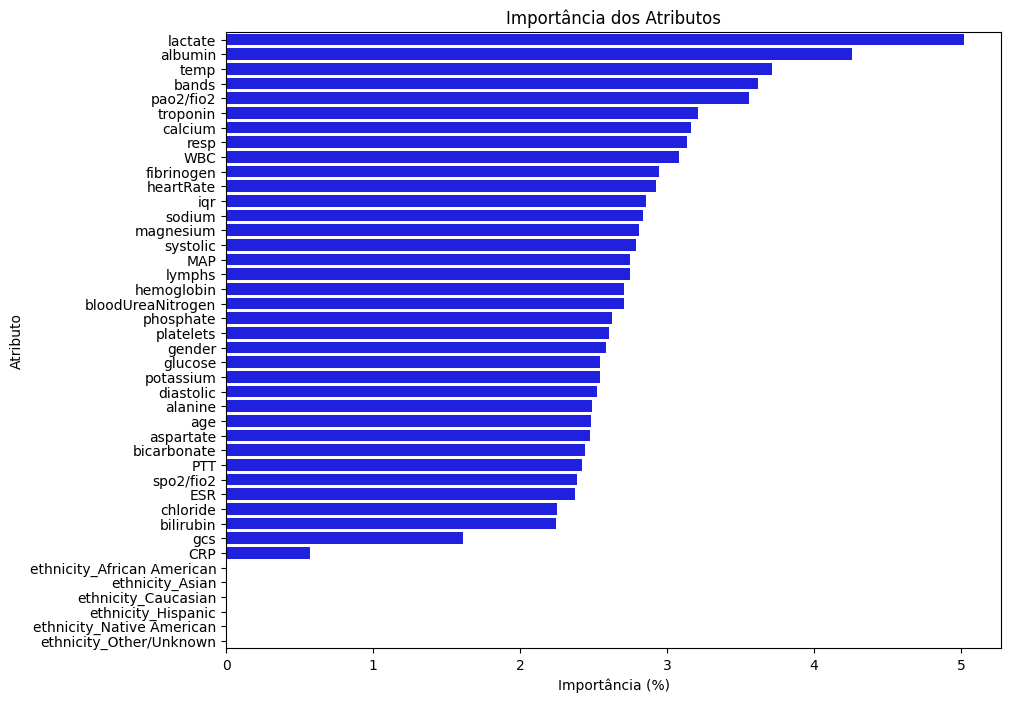

In [8]:
df = pd.read_csv('df_final.csv')
resultado = XGBoost(df)

Regressão

Importância dos Atributos:
                       Feature  Importance
3                          CRP    9.500315
2                        bands    7.057953
11                   pao2/fio2    6.798072
4                          ESR    6.638721
9                         resp    4.418229
13                   heartRate    3.767578
22                  hemoglobin    3.700603
24                   platelets    3.503339
17                         MAP    3.325585
14                    troponin    3.125728
7                          WBC    2.848951
23                         iqr    2.747330
5                         temp    2.600622
27                     albumin    2.523775
8                       lymphs    2.400965
25                         PTT    2.359828
1                          age    2.284693
26                  fibrinogen    2.261262
28                    chloride    2.128022
10                   spo2/fio2    2.059350
35                   magnesium    2.035708
29                     gluc

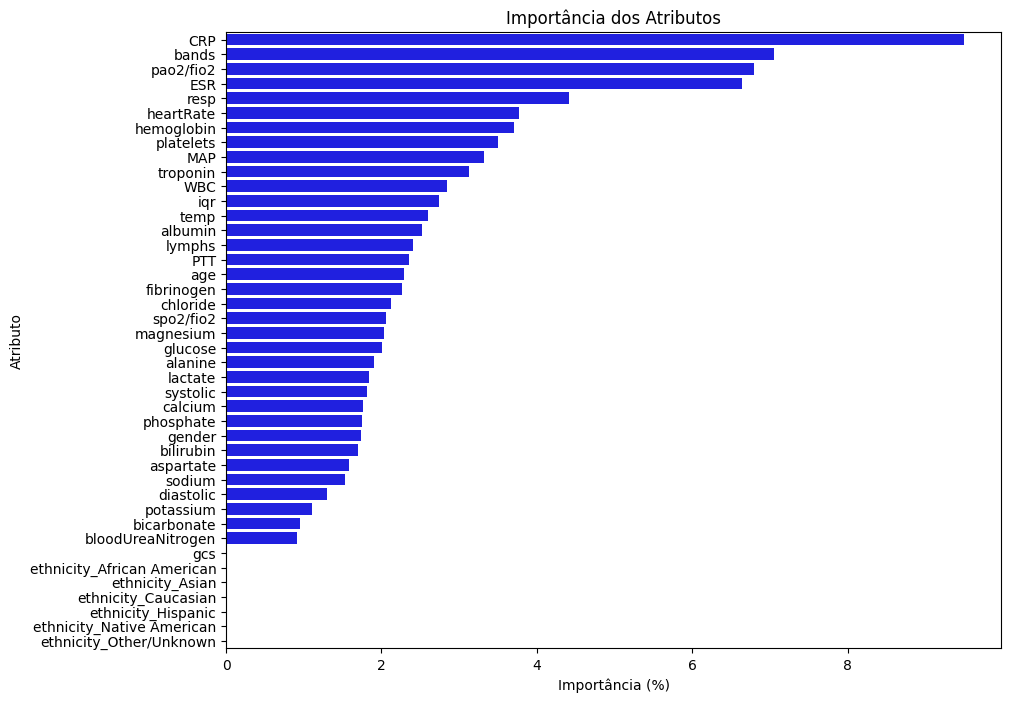

In [9]:
df_reg = pd.read_csv('df_regressao.csv')
resultado = XGBoost(df_reg)

# Seleção de atributos Chi Square

In [42]:
X = df.drop(columns=['patientunitstayid', 'diagnostico'])  # Atributos
y = df['diagnostico']  # Alvo

# Aplicar o chi2 para calcular os scores de chi-square
'''chi_scores = chi2(X, y)

# Criar um DataFrame com os resultados
chi2_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_scores[0],
    'p-value': chi_scores[1]
})

# Ordenar por chi-square score para obter o ranking dos atributos
chi2_df = chi2_df.sort_values(by='Chi2 Score', ascending=False)

# Exibir o ranking
print(chi2_df)'''

                       Feature    Chi2 Score        p-value
9                    heartRate  7.419040e+02  2.310822e-163
14           bloodUreaNitrogen  7.348758e+02  7.798212e-162
4                       lymphs  7.320303e+02  3.241363e-161
13                         MAP  6.304400e+02  4.009892e-139
11                    systolic  4.647851e+02  4.371047e-103
5                         resp  2.417823e+02   1.607287e-54
16                   aspartate  2.362084e+02   2.639210e-53
24                     glucose  2.335921e+02   9.817249e-53
20                   platelets  1.453978e+02   1.757863e-33
12                   diastolic  1.270146e+02   1.844087e-29
21                         PTT  8.277258e+01   9.205825e-20
7                    pao2/fio2  5.671726e+01   5.032001e-14
22                     albumin  4.737237e+01   5.870441e-12
1                          age  3.746776e+01   9.293649e-10
15                     alanine  3.367098e+01   6.526703e-09
8                  bicarbonate  2.905469